<a href="https://colab.research.google.com/github/benject/mediapipe_jax/blob/main/src/mirror/pytorch_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<bound method NDFrame.head of       Unnamed: 0                                         image_path  \
0              0  L:\DL_Dataset\facescape\fsmview_trainset\1\18_...   
1              1  L:\DL_Dataset\facescape\fsmview_trainset\1\18_...   
2              2  L:\DL_Dataset\facescape\fsmview_trainset\1\18_...   
3              3  L:\DL_Dataset\facescape\fsmview_trainset\1\18_...   
4              4  L:\DL_Dataset\facescape\fsmview_trainset\10\18...   
...          ...                                                ...   
2609        2609  L:\DL_Dataset\facescape\fsmview_trainset\98\1_...   
2610        2610  L:\DL_Dataset\facescape\fsmview_trainset\99\1_...   
2611        2611  L:\DL_Dataset\facescape\fsmview_trainset\99\1_...   
2612        2612  L:\DL_Dataset\facescape\fsmview_trainset\99\1_...   
2613        2613  L:\DL_Dataset\facescape\fsmview_trainset\9

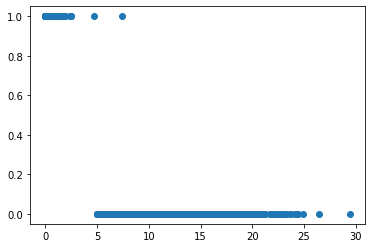

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-


from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/jax/data/featureset.csv")
print(df.head)


X = df.loc[:,'area'].to_numpy()
Y = df.loc[:,'eyeblink'].to_numpy()

plt.scatter(X,Y)
plt.show()



In [ ]:

'''pytorch implementation'''

import torch 

import torch.nn as nn

class torch_NN(nn.Module):

    def __init__(self) -> None:

        super(torch_NN,self).__init__()

        #begin to design the network
        self.fc1 = nn.Linear(1,1)
    
    def forward(self,x):

        x = self.fc1(x)
        
        return x



X = X.reshape(2614,1)
Y = Y.reshape(2614,1)

net = torch_NN()

loss_fun = nn.MSELoss() #损失函数

optim_fun = torch.optim.Adam(net.parameters(),lr = 1.0) #梯度下降函数

features = torch.from_numpy(X).float()
label = torch.from_numpy(Y).float()

for i in range(10000):

    predict = net(features)

    loss = loss_fun(predict,label)

    optim_fun.zero_grad()

    loss.backward()

    optim_fun.step()



fc1.weight Parameter containing:
tensor([[-0.0714]], requires_grad=True)
fc1.bias Parameter containing:
tensor([0.9275], requires_grad=True)


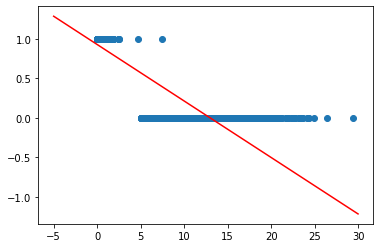

In [ ]:
w = 0
b = 0


for name , value in net.named_parameters():

    print(name,value)

    if 'weight' in name:
        w = value.data
    else:
        b = value.data

X = df.loc[:,'area'].to_numpy()
Y = df.loc[:,'eyeblink'].to_numpy()

# draw lines

x = np.linspace(-5,30, 50)

y = w.detach().numpy()[0,0]*x + b.detach().numpy()

plt.figure()

plt.scatter(X,Y)

plt.plot(x,y,color = "red")

plt.show()
